<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/DATAFRAME_VIVIENDAS_CALIFORNIA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Machine Learnin Fetch California Housing**


***ANALISIS Y EXPLORACION DE DATOS***


**PRESENTADO POR:** JOSE LUIS ROBAYO PAZ

**PROGRAMA:** INTELIGENCIA ARTIFICIAL

**TALENTO TECH**

Cali, 23 de Febrero del 2025




**DATAFRAME CARATERISTICAS DE LAS VIVIENDAS EN CALIFORNIA**

Para este desarrollo se implementara un analisis exploratorio de datos mediante utilizando el dataframe fetch_california_housing, la cual relaciona las carateristicas de las viviendas en California y categoriza por en un dataset por area, numero de habitaciones, numero de personas que pueden habitar, el numero de años de antiguedad de la vivienda etc. Estos datos a explorar son de tipo flotante, los cuales fueron extraidos gracias a la biblioteca de ciencias de datos mediante la importacion de la subcarpeta sklearn.datasets del paquete load_iris.


In [ ]:
# Library Import
import numpy as np #Tratamiento de arrays
import pandas as pd # Dataframes
import seaborn as sns #Estadistica y visualizacion
import matplotlib.pyplot as plt #Visualizacion
from sklearn.model_selection import train_test_split # Split de los dato
from sklearn.preprocessing import StandardScaler # Standarizar los datos
from sklearn.linear_model import LogisticRegression # Modelos de regresion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Metrica para evaluar el modelo



**DESCRIPCION DE LAS VARIABLES**

El tipo de variable empleado en el dataset es de tipo FLOAT para cada una de las carateristicas de las viviendas de California.

**CARGA DE DATAFRAME IRIS**

In [ ]:
# Cargar el dataset
from sklearn.datasets import fetch_california_housing ## Se llama a la subcarpeta Sklearn.dataset para importar el dataframe IRIS mediante la libreria load_iris
data = fetch_california_housing() ## Guardamos el dataframe IRIS en la variable data
californiaH = pd.DataFrame(data.data, columns=data.feature_names)## Creamos la variable df y utilizamos el metodo DataFrame para convertir los datos a un dataframe
print(californiaH.head(10))
maximo=np.max(californiaH['HouseAge'])
minimo=np.min(californiaH["HouseAge"])
mediana=np.median(californiaH["HouseAge"])
print(f'el maximo es {maximo} y el minimo es de  {minimo} y la mediana es {mediana}')
californiaH['HouseAge'] = data.target ## Accedemos al archivo dataframe y utilizamos data.target agregar columnas de etiquetas
#if californiaH["HouseAge"]>=0:
#print(californiaH['HouseAge'].dtype)
##datos=californiaH['HouseAge'][1]
##print(datos)



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
8    -122.26  
9    -122.25 

**SUSTITUCION DE DATO TIPO INT**

En la siguiente etapa se realiza la sustitucion de las variables de tipo STR por tipo INT, utilizando el metodo (map) con el proposito de facilitar el analisis exploratorio de datos en la regrecion.

In [ ]:

#datos=californiaH['HouseAge']

californiaH['HouseAge']=pd.cut(californiaH['HouseAge'], bins=[0.0,1.5,3.0,5.00001], labels=[ 0,1,2], right=False)
##dato3=np.max(californiaH["HouseAge"])
##print(dato3)
#californiaH['HouseAge'] = californiaH['HouseAge'].map({range(0.0,17.0):0, range(17.0,34.0):1, range(34.0,53.0):2}) ## Accedemos al archivo dataframe y realizamos un mapeo para sustituir las variables tipo string en constantes para facilitar el analisis
#californiaH['HouseAge'] = californiaH['HouseAge'].replace({0.050680: 0, -0.044642: 1})
#dataDiabetes["sex"].replace(-0.044642,0)
##print(californiaH['HouseAge'].unique())
#print(californiaH['HouseAge'].dtype)


**EXPLORACION INICIAL DEL DATAFRAME**

Muestra las primeras filas del DataFrame (df). Por defecto, muestra las primeras 5 filas, pero puedes especificar cuántas filas deseas ver pasando un número como argumento; permite obtener una vista rápida de la estructura del DataFrame y de los datos que contiene y ayuda a verificar que los datos se hayan cargado correctamente.

In [ ]:
# Exploración inicial
display(californiaH.head(10)) ## mostrar las primeras filas de un DataFrame en un formato más visual cuando se trabaja en Jupyter Notebook.
print(californiaH.info()) ## Creamos un print y utilizamos el metodo info() para obtener un resumen del dataframe
print(californiaH.describe())## Insertammos un print y utilizamos el metodo .describe() para obtener la descripcion de las variables y la cantidad de datos nulos
moda_houseage = californiaH['HouseAge'].mode()[0]
californiaH['HouseAge'].fillna(moda_houseage, inplace=True)
print(californiaH['HouseAge'].isnull().sum())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,2,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,2,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,2,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,2,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,2,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,1,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,1,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,1,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,1,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,1,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MedInc      20640 non-null  float64 
 1   HouseAge    20640 non-null  category
 2   AveRooms    20640 non-null  float64 
 3   AveBedrms   20640 non-null  float64 
 4   Population  20640 non-null  float64 
 5   AveOccup    20640 non-null  float64 
 6   Latitude    20640 non-null  float64 
 7   Longitude   20640 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 1.1 MB
None
             MedInc      AveRooms     AveBedrms    Population      AveOccup  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671      5.429000      1.096675   1425.476744      3.070655   
std        1.899822      2.474173      0.473911   1132.462122     10.386050   
min        0.499900      0.846154      0.333333      3.000000      0.692308   
25%        2.563400

**VISUALIZACION DE RELACIONES ENTRE PARES**

En esta etapa visualizamos las relaciones entre pares de variables numéricas en un DataFrame, para el análisis exploratorio de datos (EDA), ya que nos permite obtener una visión general rápida de cómo se distribuyen y se relacionan las variables entre sí.

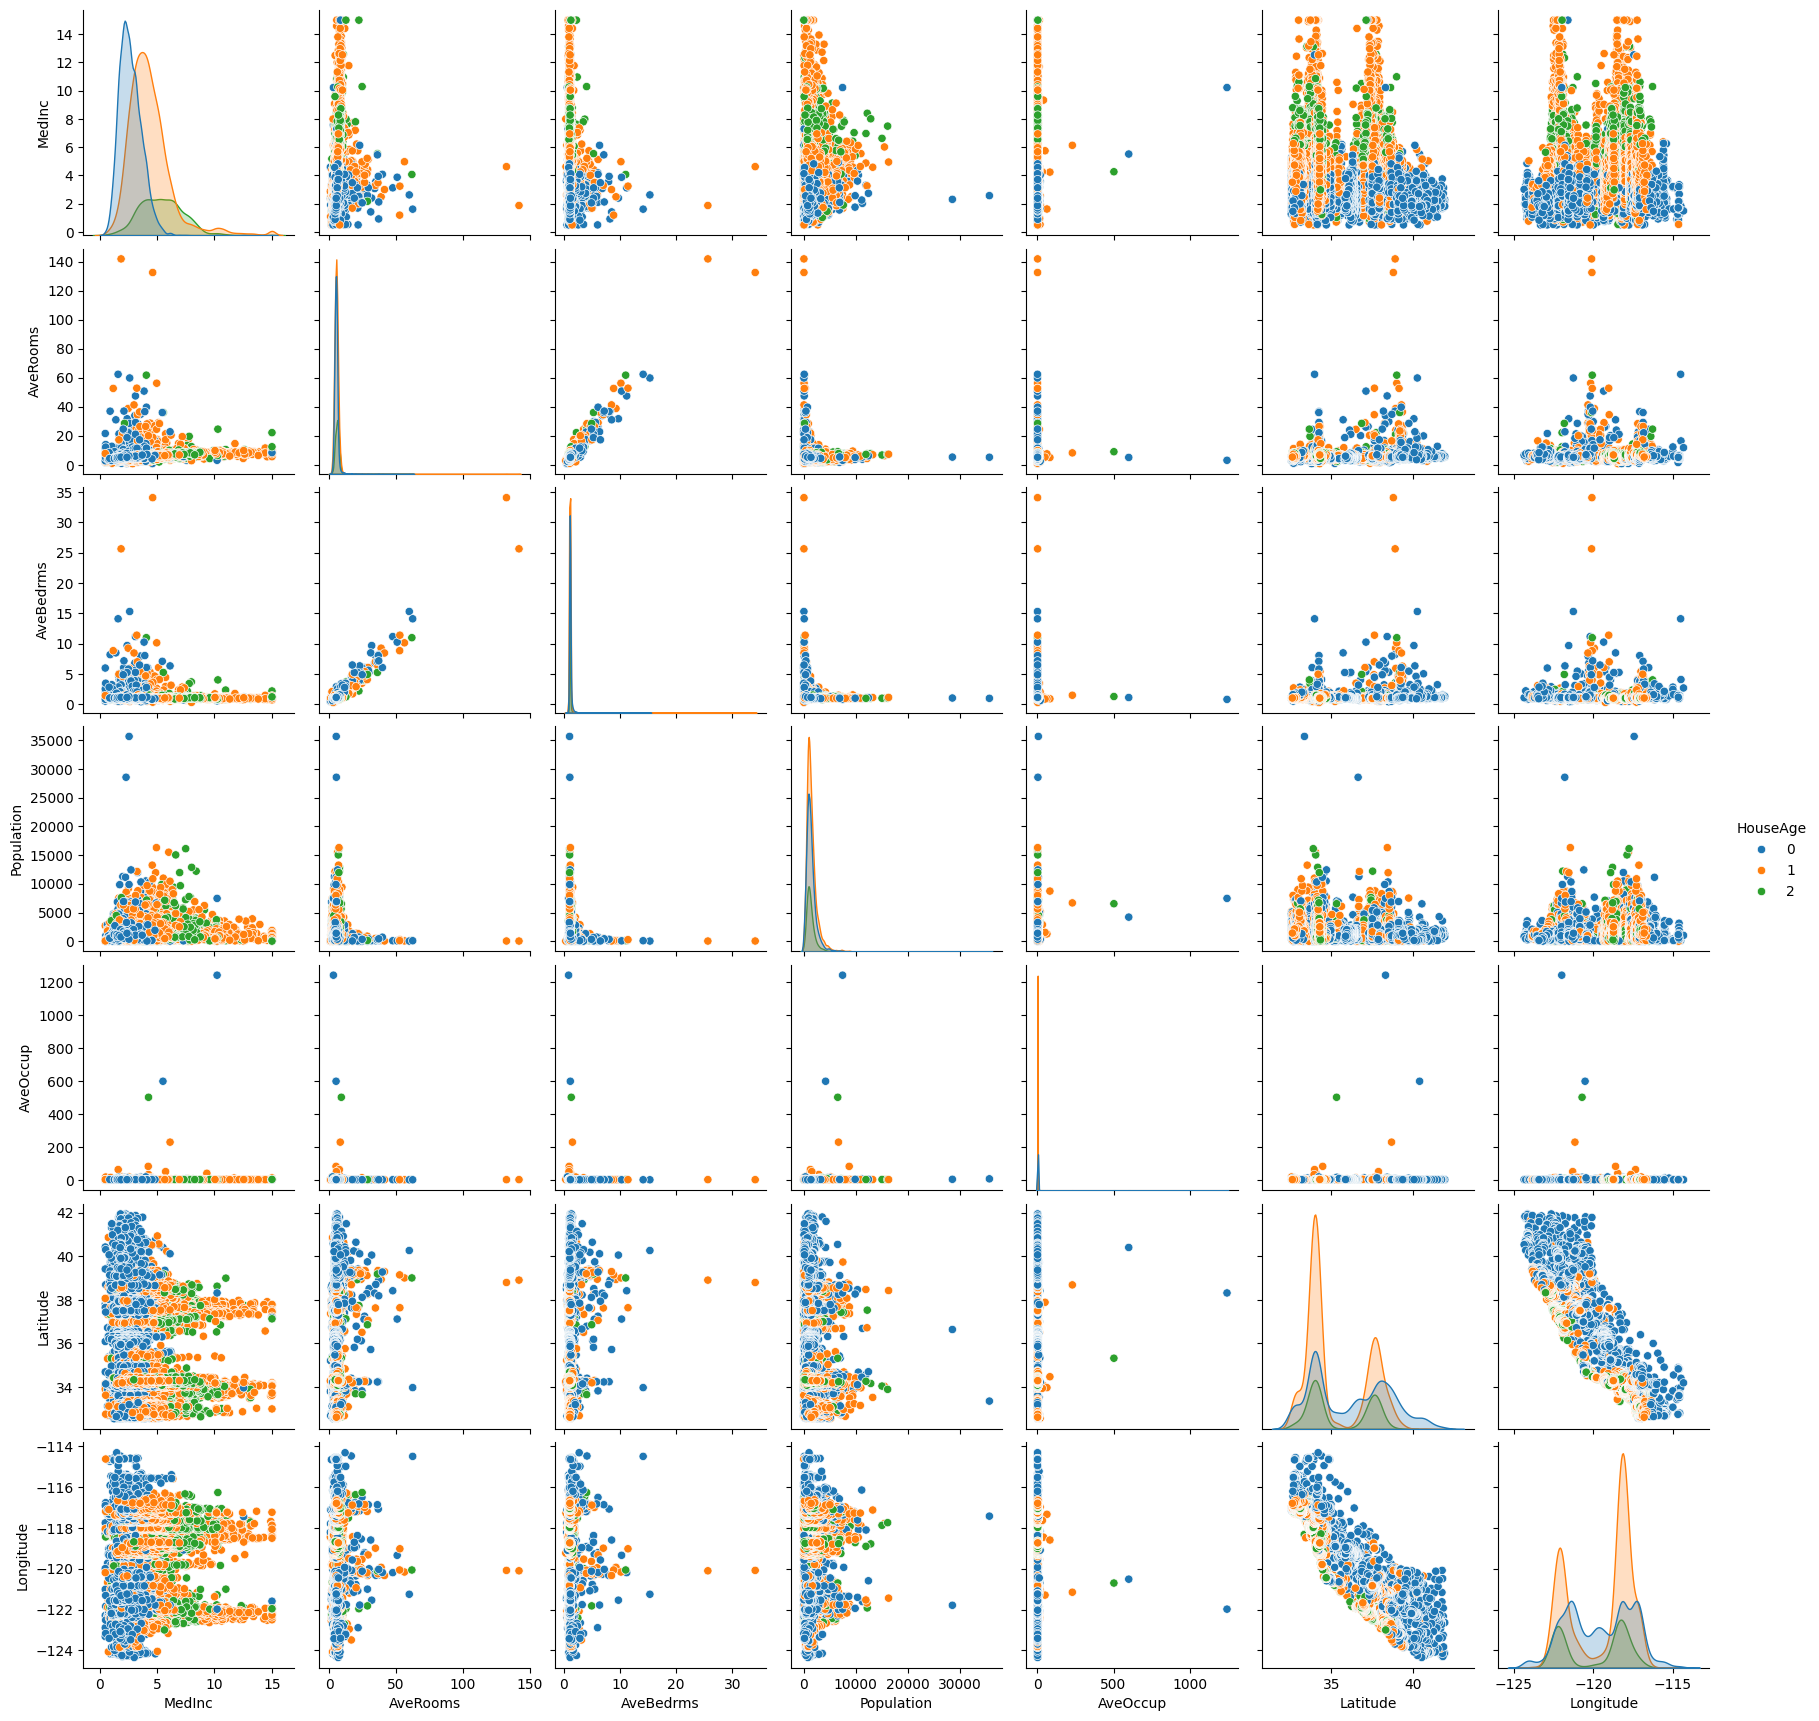

In [ ]:
# Visualización de datos
sns.pairplot(californiaH, hue='HouseAge')  ## Crea un pairplot (matriz de gráficos de pares) del DataFrame 'df'.
                                 ## Colorea los puntos según la especie, mostrando cómo se separan las clases.
plt.show()                       ## Muestra el gráfico generado por sns.pairplot().

**MATRIZ DE CORRELACION**

Una matriz de correlación es una tabla que muestra la relación lineal entre pares de variables numéricas, cuantificando su fuerza y dirección mediante coeficientes como el de Pearson. Permite identificar patrones y dependencias entre variables, facilitando la selección de características relevantes para modelos predictivos.

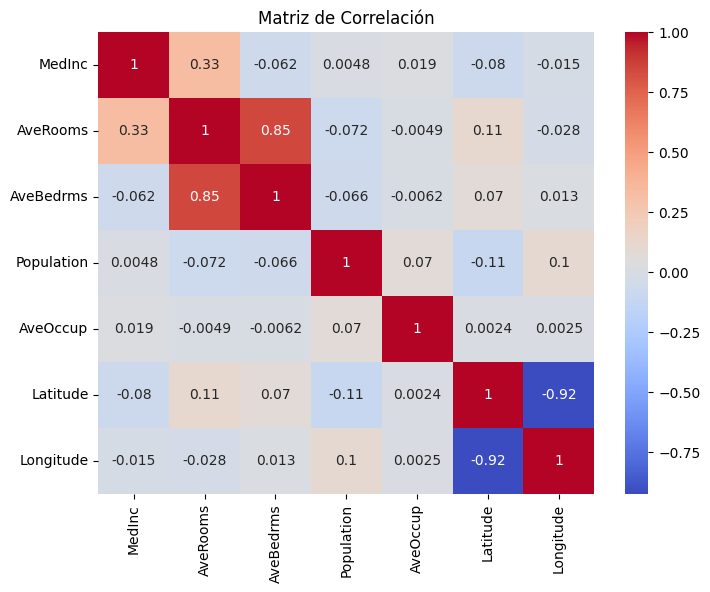

In [ ]:
# Correlación entre variables
plt.figure(figsize=(8, 6))  # Crea una nueva figura con un tamaño de 8x6 pulgadas.
sns.heatmap(californiaH.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Genera un mapa de calor (heatmap) de la matriz de correlación del DataFrame 'df'.
                                                                 # 'df.corr(numeric_only=True)' calcula la matriz de correlación (solo para columnas numéricas).
                                                                 # 'annot=True' muestra los valores de correlación en las celdas.
                                                                 # 'cmap='coolwarm' utiliza un esquema de colores de azul a rojo para representar la correlación.
plt.title("Matriz de Correlación")  # Establece el título del gráfico como "Matriz de Correlación".
plt.show()  # Muestra el gráfico generado.

**PREPARACION DE DATOS PARA EL MODELO DE APRENDIZAJE**

En la siguiente etapa prepara los datos para un modelo de aprendizaje automático, separando las características predictivas de la variable objetivo y dividiendo el conjunto de datos en subconjuntos de entrenamiento y prueba. Primero, la columna 'species', que representa las clases a predecir, se separa del resto del DataFrame (df) para crear la variable objetivo y. Luego, se utiliza la función train_test_split para dividir aleatoriamente los datos en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test), asegurando que el modelo se entrene en una porción de los datos y se evalúe en una porción separada para medir su rendimiento.

In [ ]:
# División en conjunto de entrenamiento y prueba
X = californiaH.drop(columns=['HouseAge']) # Separa las características (todas las columnas excepto 'species') en la variable X.
y = californiaH['HouseAge'] # Separa la variable objetivo ('species') en la variable y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Divide los datos en conjuntos de entrenamiento y prueba.
                                                                                        # test_size=0.2 indica que el 20% de los datos se utilizarán para la prueba.
                                                                                        # random_state=42 asegura que la división sea reproducible.

**ESTANDARIZACION DE DATOS**

Este bloque de código estandariza las características de los conjuntos de entrenamiento y prueba, un paso crucial para muchos algoritmos de aprendizaje automático que son sensibles a la escala de los datos. Se utiliza StandardScaler para transformar las características de manera que tengan una media de 0 y una desviación estándar de 1, lo que facilita la convergencia del modelo y mejora su rendimiento. Primero, se ajusta el escalador a los datos de entrenamiento y se transforman, y luego se aplica la misma transformación a los datos de prueba, asegurando que ambos conjuntos estén en la misma escala.

In [ ]:
# Estandarización de datos
scaler = StandardScaler() # Inicializa el escalador StandardScaler, que estandariza las características.
X_train_scaled = scaler.fit_transform(X_train) # Ajusta el escalador a los datos de entrenamiento y los transforma.
X_test_scaled = scaler.transform(X_test) # Transforma los datos de prueba usando el mismo escalador ajustado con los datos de entrenamiento.


**REGRESION LOGISTICA**


Este bloque de código entrena un modelo de Regresión Logística para clasificar las especies de Iris, utilizando los datos de entrenamiento escalados. Se inicializa el modelo con la estrategia 'ovr' (uno contra el resto) para problemas de clasificación multiclase y se establece un número máximo de iteraciones. Luego, el modelo se ajusta a los datos de entrenamiento escalados y se utiliza para hacer predicciones en el conjunto de prueba escalado, generando las predicciones y_pred.

In [ ]:

# Modelo de Regresión Logística
model = LogisticRegression(multi_class='ovr', max_iter=100) # Inicializa el modelo de Regresión Logística con estrategia 'ovr' y máximo de 200 iteraciones.
model.fit(X_train_scaled, y_train) # Entrena el modelo usando los datos de entrenamiento escalados.
y_pred = model.predict(X_test_scaled) # Realiza predicciones en el conjunto de prueba escalado.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**EVALUACION Y PRESICION DEL ENTRENAMIENTO**

Este bloque de código evalúa el rendimiento del modelo de Regresión Logística entrenado, calculando la precisión y generando un informe de clasificación y una matriz de confusión para entender cómo el modelo clasifica las diferentes especies. Se calcula la precisión comparando las predicciones del modelo con las etiquetas reales del conjunto de prueba. El informe de clasificación proporciona métricas detalladas como precisión, recall y F1-score para cada clase. La matriz de confusión visualiza el número de predicciones correctas e incorrectas para cada clase, ofreciendo una visión clara del rendimiento del modelo.

In [ ]:


# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred)) ## Calcula la precisión del modelo comparando las predicciones con las etiquetas reales.
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred)) ## Genera e imprime un informe de clasificación con métricas por clase.
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))## Genera e imprime una matriz de confusión para visualizar el rendimiento por clase.

Accuracy: 0.7076065891472868

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1500
           1       0.66      0.86      0.75      2049
           2       0.00      0.00      0.00       579

    accuracy                           0.71      4128
   macro avg       0.48      0.54      0.51      4128
weighted avg       0.62      0.71      0.66      4128


Matriz de confusión:
 [[1168  332    0]
 [ 296 1753    0]
 [  18  561    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**CONCLUSIONES**

El exito de un sistema predictivo depende de un tratamiento adecuado de los datos a explorar, como por ejemplo la estandarizacion y la visualizacion del indice de correlacion; gracias al tratamiento adecuado de los datos el sistema predictivo, la evaluacion final del accuracy fue del 70% de presicion.